In [ ]:
import cv2
import numpy as np
import tensorflow as tf


# Step 2: Download the pre-trained R-FCN model
# !wget -P dir 'http://download.tensorflow.org/models/object_detection/rfcn_resnet101_coco_2018_01_28.tar.gz'
model_path = 'rfcn_resnet101_coco_2018_01_28/saved_model'

# Step 3: Load the pre-trained model
model = tf.saved_model.load(model_path)

In [ ]:
import tarfile

with tarfile.open("/content/rfcn_model_coco.tar.gz", "r:gz") as tar:
  tar.extractall()

In [ ]:
image_path = '/content/image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.expand_dims(image, axis=0)

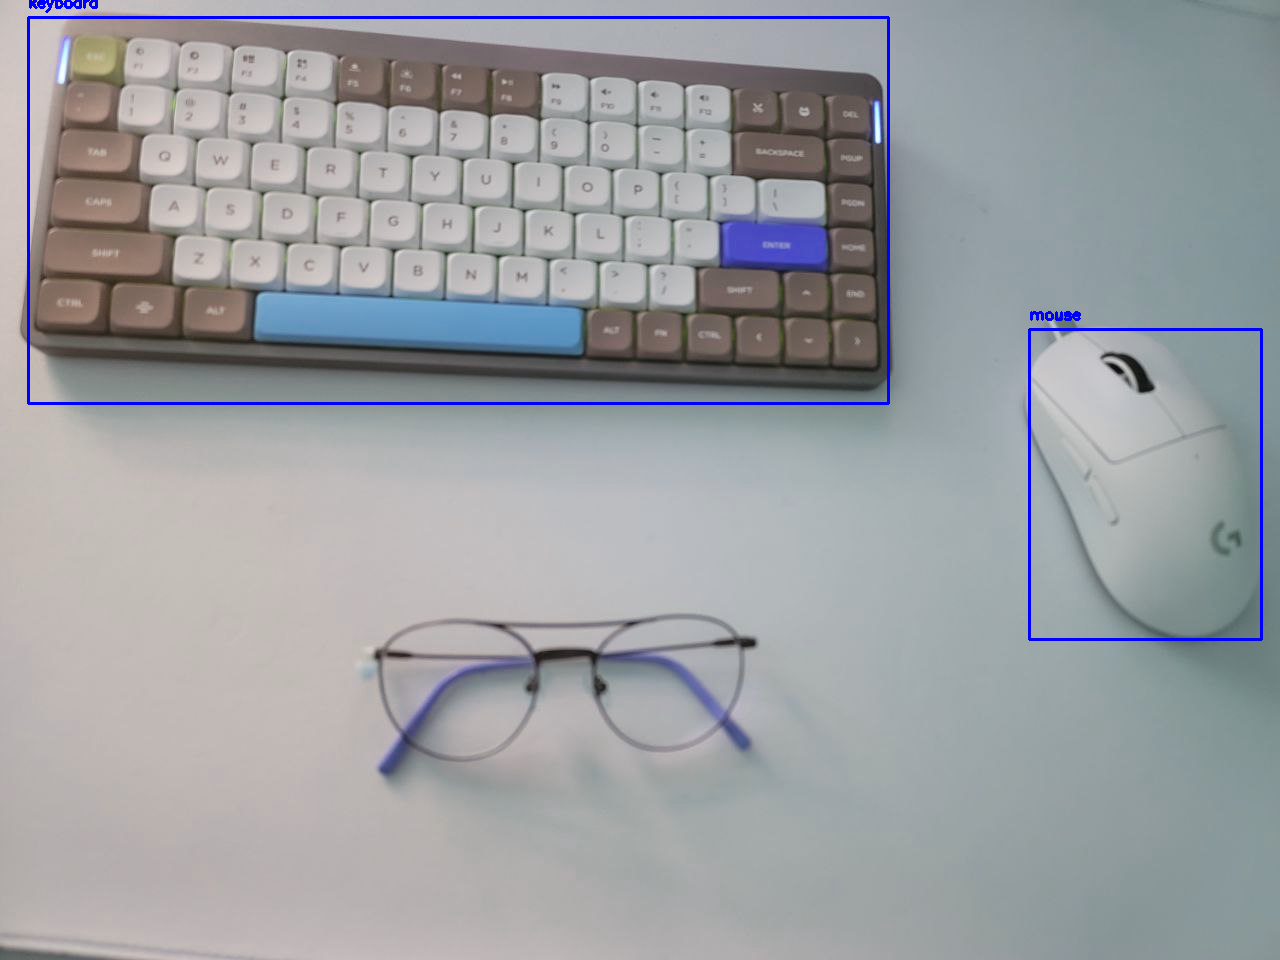

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

label_names = {1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck',
           9: 'boat', 10: 'traffic light', 11: 'fire hydrant', 13: 'stop sign', 14: 'parking meter', 15: 'bench', 
           16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear',
           24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag', 32: 'tie', 33: 'suitcase',
           34: 'frisbee', 35: 'skis', 36: 'snowboard', 37: 'sports ball', 38: 'kite', 39: 'baseball bat', 
           40: 'baseball glove', 41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle', 
           46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon', 51: 'bowl', 52: 'banana', 
           53: 'apple', 54: 'sandwich', 55: 'orange', 56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 
           60: 'donut', 61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed', 67: 'dining table', 
           70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse', 75: 'remote', 76: 'keyboard', 77: 'cell phone',
           78: 'microwave', 79: 'oven', 80: 'toaster', 81: 'sink', 82: 'refrigerator', 84: 'book', 85: 'clock',
           86: 'vase', 87: 'scissors', 88: 'teddy bear', 89: 'hair drier', 90: 'toothbrush'}

input_tensor = tf.convert_to_tensor(image)
outputs = model.signatures['serving_default'](input_tensor)
boxes = outputs['detection_boxes'].numpy()
classes = outputs['detection_classes'].numpy()
scores = outputs['detection_scores'].numpy()

# Visualize the object detection results
for i in range(boxes.shape[1]):
    if scores[0,i] > 0.5:
        ymin, xmin, ymax, xmax = boxes[0,i,:]
        xmin = int(xmin * image.shape[2])
        xmax = int(xmax * image.shape[2])
        ymin = int(ymin * image.shape[1])
        ymax = int(ymax * image.shape[1])
        class_id = int(classes[0,i])
        class_name = label_names[class_id]
        cv2.rectangle(image[0], (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
        cv2.putText(image[0], class_name, (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

cv2_imshow(image[0])

In [ ]:
image_path = '/content/image2.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.expand_dims(image, axis=0)

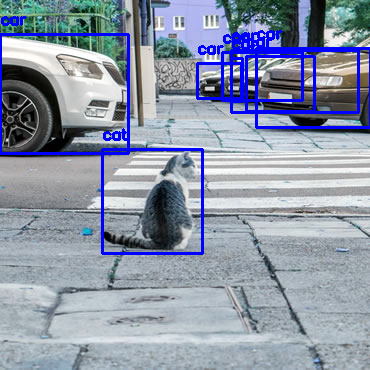

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

label_names = {1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck',
           9: 'boat', 10: 'traffic light', 11: 'fire hydrant', 13: 'stop sign', 14: 'parking meter', 15: 'bench', 
           16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear',
           24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag', 32: 'tie', 33: 'suitcase',
           34: 'frisbee', 35: 'skis', 36: 'snowboard', 37: 'sports ball', 38: 'kite', 39: 'baseball bat', 
           40: 'baseball glove', 41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle', 
           46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon', 51: 'bowl', 52: 'banana', 
           53: 'apple', 54: 'sandwich', 55: 'orange', 56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 
           60: 'donut', 61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed', 67: 'dining table', 
           70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse', 75: 'remote', 76: 'keyboard', 77: 'cell phone',
           78: 'microwave', 79: 'oven', 80: 'toaster', 81: 'sink', 82: 'refrigerator', 84: 'book', 85: 'clock',
           86: 'vase', 87: 'scissors', 88: 'teddy bear', 89: 'hair drier', 90: 'toothbrush'}

input_tensor = tf.convert_to_tensor(image)
outputs = model.signatures['serving_default'](input_tensor)
boxes = outputs['detection_boxes'].numpy()
classes = outputs['detection_classes'].numpy()
scores = outputs['detection_scores'].numpy()

# Visualize the object detection results
for i in range(boxes.shape[1]):
    if scores[0,i] > 0.5:
        ymin, xmin, ymax, xmax = boxes[0,i,:]
        xmin = int(xmin * image.shape[2])
        xmax = int(xmax * image.shape[2])
        ymin = int(ymin * image.shape[1])
        ymax = int(ymax * image.shape[1])
        class_id = int(classes[0,i])
        class_name = label_names[class_id]
        cv2.rectangle(image[0], (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
        cv2.putText(image[0], class_name, (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

cv2_imshow(image[0])